**Задание 1**

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
data = boston.data

In [5]:
target = boston.target

In [6]:
feature_names = boston.feature_names

In [7]:
X = pd.DataFrame(data, columns=feature_names)

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
y = pd.DataFrame(target, columns=['price'])

In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)
y_pred

array([[28.64896005],
       [36.49501384],
       [15.4111932 ],
       [25.40321303],
       [18.85527988],
       [23.14668944],
       [17.3921241 ],
       [14.07859899],
       [23.03692679],
       [20.59943345],
       [24.82286159],
       [18.53057049],
       [-6.86543527],
       [21.80172334],
       [19.22571177],
       [26.19191985],
       [20.27733882],
       [ 5.61596432],
       [40.44887974],
       [17.57695918],
       [27.44319095],
       [30.1715964 ],
       [10.94055823],
       [24.02083139],
       [18.07693812],
       [15.934748  ],
       [23.12614028],
       [14.56052142],
       [22.33482544],
       [19.3257627 ],
       [22.16564973],
       [25.19476081],
       [25.31372473],
       [18.51345025],
       [16.6223286 ],
       [17.50268505],
       [30.94992991],
       [20.19201752],
       [23.90440431],
       [24.86975466],
       [13.93767876],
       [31.82504715],
       [42.56978796],
       [17.62323805],
       [27.01963242],
       [17

In [17]:
chek_test = pd.DataFrame({'y_test': y_test['price'],
                          'y_pred': y_pred.flatten()},
                         columns=['y_test', 'y_pred'])
chek_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(y_test, y_pred)

0.711226005748496

**Задание 2**


Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [22]:
rfr.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [23]:
y_pred = rfr.predict(X_test)
y_pred

array([22.80641237, 31.13146352, 16.33912494, 23.81072598, 17.13952074,
       21.8322837 , 19.89574701, 14.75411774, 21.2408346 , 20.89865761,
       20.2028696 , 19.95659298,  8.03651316, 21.51673023, 19.36048089,
       25.28222025, 18.82002442,  8.47636459, 45.9477    , 15.50141896,
       24.37448371, 23.98037718, 14.54950214, 23.57447941, 15.05119767,
       15.23703316, 21.59141811, 13.90617333, 19.67698308, 21.0552311 ,
       19.69950085, 23.2483229 , 29.99451024, 20.15961264, 14.39724675,
       16.02131035, 34.26043401, 19.19342625, 21.17764473, 24.22833434,
       18.60497   , 29.57765089, 45.5585    , 19.62038232, 22.575541  ,
       14.0331484 , 15.76855872, 24.50013129, 19.15469322, 28.28791716,
       21.35262285, 33.89102953, 17.67031122, 26.25583284, 45.51992393,
       21.89588357, 15.85210261, 32.38172361, 22.14020328, 20.61773671,
       25.39990971, 33.63617562, 30.10425708, 18.97044937, 27.14227131,
       16.90607   , 13.90610446, 23.10904339, 28.86343833, 15.57

In [24]:
chek_test = pd.DataFrame({'y_test': y_test['price'],
                          'y_pred': y_pred.flatten()},
                         columns=['y_test', 'y_pred'])
chek_test.head(10)

,y_test,y_pred
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521
76,20.0,21.832284
316,17.8,19.895747
140,14.0,14.754118
471,19.6,21.240835
500,16.8,20.898658


In [25]:
r2_score(y_test, y_pred)

0.87472606157312

Модель, обученная с помощью RandomForestRegressor на 16.3500055824624 % точнее, по сравнению с LinearRegression.

***Задание 3**

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [26]:
?RandomForestRegressor

In [27]:
feature_importances = rfr.feature_importances_
feature_importances

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

In [28]:
np.sum(feature_importances)

1.0

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Text(0, 0.5, 'Признак')

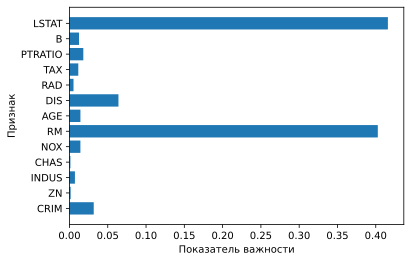

In [30]:
plt.barh(X_train.columns, feature_importances.flatten())
plt.xlabel('Показатель важности')
plt.ylabel('Признак')

На диаграмме можно увидеть, что наибольшую важность показывают такие признаки как LSTAT - статистика низкоуровнего населения (возможно неправильно перевел, но информации в интернете по этому признаку крайне мало) и RM - среднее количество комнат в доме.

***Задание 4**

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.

Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
Загрузите датасет creditcard.csv и создайте датафрейм df.
С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована. Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100.
Просмотрите первые 10 строк датафрейма df.

Создайте датафрейм X из датафрейма df, исключив столбец Class.
Создайте объект Series под названием y из столбца Class.
Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.
Просмотрите информацию о их форме.
Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]
Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.

Обучите модель на тренировочном наборе данных (может занять несколько минут).
Просмотрите параметры лучшей модели с помощью атрибута best_params_.
Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_csv('creditcard.csv')

In [33]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [34]:
value_counts = df['V1'].value_counts(normalize=True)
value_counts

 2.055797    0.000270
 1.245674    0.000270
 2.053311    0.000218
 1.302378    0.000211
 2.040211    0.000186
               ...   
-2.010678    0.000004
 0.884294    0.000004
 1.902829    0.000004
 2.001652    0.000004
-0.563153    0.000004
Name: V1, Length: 275663, dtype: float64

In [35]:
pd.options.display.max_columns = 100

In [36]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [37]:
X = df.iloc[:, :-1]
y = df['Class']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199364 entries, 222925 to 271
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    199364 non-null  float64
 1   V1      199364 non-null  float64
 2   V2      199364 non-null  float64
 3   V3      199364 non-null  float64
 4   V4      199364 non-null  float64
 5   V5      199364 non-null  float64
 6   V6      199364 non-null  float64
 7   V7      199364 non-null  float64
 8   V8      199364 non-null  float64
 9   V9      199364 non-null  float64
 10  V10     199364 non-null  float64
 11  V11     199364 non-null  float64
 12  V12     199364 non-null  float64
 13  V13     199364 non-null  float64
 14  V14     199364 non-null  float64
 15  V15     199364 non-null  float64
 16  V16     199364 non-null  float64
 17  V17     199364 non-null  float64
 18  V18     199364 non-null  float64
 19  V19     199364 non-null  float64
 20  V20     199364 non-null  float64
 21  V21     

In [40]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85443 entries, 262922 to 198375
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    85443 non-null  float64
 1   V1      85443 non-null  float64
 2   V2      85443 non-null  float64
 3   V3      85443 non-null  float64
 4   V4      85443 non-null  float64
 5   V5      85443 non-null  float64
 6   V6      85443 non-null  float64
 7   V7      85443 non-null  float64
 8   V8      85443 non-null  float64
 9   V9      85443 non-null  float64
 10  V10     85443 non-null  float64
 11  V11     85443 non-null  float64
 12  V12     85443 non-null  float64
 13  V13     85443 non-null  float64
 14  V14     85443 non-null  float64
 15  V15     85443 non-null  float64
 16  V16     85443 non-null  float64
 17  V17     85443 non-null  float64
 18  V18     85443 non-null  float64
 19  V19     85443 non-null  float64
 20  V20     85443 non-null  float64
 21  V21     85443 non-null  float

In [41]:
y_train

222925    0
163811    0
196038    0
25173     0
253792    0
         ..
194533    0
163532    0
47169     0
138367    0
271       0
Name: Class, Length: 199364, dtype: int64

In [42]:
y_test

262922    0
123418    0
206135    0
273483    0
245758    0
         ..
109541    0
41813     0
16722     0
36147     0
198375    0
Name: Class, Length: 85443, dtype: int64

In [43]:
parameters = [{'n_estimators': [10, 15],
               'max_features': np.arange(3, 5),
               'max_depth': np.arange(4, 7)}]

In [44]:
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                   param_grid=parameters,
                   scoring='roc_auc',
                   cv=3)

In [45]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [46]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [47]:
y_pred = clf.predict_proba(X_test)
y_pred

array([[9.99070828e-01, 9.29171738e-04],
       [9.99704794e-01, 2.95206364e-04],
       [9.99717846e-01, 2.82154033e-04],
       ...,
       [9.99717846e-01, 2.82154033e-04],
       [9.99317795e-01, 6.82204754e-04],
       [9.87539019e-01, 1.24609813e-02]])

In [48]:
y_pred_proba = y_pred[:,1]

In [49]:
from sklearn.metrics import roc_auc_score

In [50]:
roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

In [51]:
from sklearn.metrics import roc_curve

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label = 1)

In [53]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.17240166e-05, 1.17240166e-05,
       2.34480333e-05, 2.34480333e-05, 2.34480333e-05, 2.34480333e-05,
       3.51720499e-05, 3.51720499e-05, 4.68960666e-05, 4.68960666e-05,
       5.86200832e-05, 5.86200832e-05, 7.03440999e-05, 7.03440999e-05,
       1.17240166e-04, 1.17240166e-04, 1.28964183e-04, 1.28964183e-04,
       1.40688200e-04, 1.40688200e-04, 1.75860250e-04, 1.75860250e-04,
       2.11032300e-04, 2.11032300e-04, 2.34480333e-04, 2.34480333e-04,
       2.57928366e-04, 2.57928366e-04, 2.69652383e-04, 3.39996483e-04,
       3.51720499e-04, 3.51720499e-04, 3.75168533e-04, 3.75168533e-04,
       3.98616566e-04, 3.98616566e-04, 4.10340583e-04, 4.10340583e-04,
      

In [54]:
tpr

array([0.        , 0.00675676, 0.02027027, 0.02702703, 0.04054054,
       0.08108108, 0.10135135, 0.16891892, 0.18918919, 0.23648649,
       0.25      , 0.26351351, 0.27702703, 0.28378378, 0.2972973 ,
       0.31756757, 0.33108108, 0.40540541, 0.40540541, 0.43243243,
       0.43918919, 0.4527027 , 0.46621622, 0.5       , 0.5       ,
       0.50675676, 0.50675676, 0.57432432, 0.57432432, 0.62162162,
       0.62162162, 0.66216216, 0.66216216, 0.67567568, 0.67567568,
       0.7027027 , 0.7027027 , 0.72297297, 0.72297297, 0.73648649,
       0.73648649, 0.74324324, 0.74324324, 0.75      , 0.75      ,
       0.76351351, 0.76351351, 0.76351351, 0.76351351, 0.77027027,
       0.77027027, 0.77702703, 0.77702703, 0.78378378, 0.78378378,
       0.7972973 , 0.7972973 , 0.80405405, 0.80405405, 0.81081081,
       0.81081081, 0.81756757, 0.81756757, 0.82432432, 0.82432432,
       0.83108108, 0.83108108, 0.83108108, 0.83108108, 0.83108108,
       0.83108108, 0.83108108, 0.83108108, 0.83783784, 0.83783

In [55]:
thresholds

array([1.99730904e+00, 9.97309041e-01, 9.96825397e-01, 9.95793889e-01,
       9.94278738e-01, 9.83520994e-01, 9.80346390e-01, 9.57873563e-01,
       9.57079156e-01, 9.42460556e-01, 9.38561896e-01, 9.33762057e-01,
       9.30140485e-01, 9.29423366e-01, 9.28625334e-01, 9.13388502e-01,
       9.05379881e-01, 8.78236879e-01, 8.72338642e-01, 8.58152033e-01,
       8.58097475e-01, 8.29450140e-01, 8.15793889e-01, 7.86362154e-01,
       7.82786983e-01, 7.55699508e-01, 7.54583009e-01, 6.42367669e-01,
       6.22912226e-01, 5.75473654e-01, 5.56843575e-01, 5.14046873e-01,
       4.70386974e-01, 4.43090323e-01, 4.36502226e-01, 3.87216511e-01,
       3.84450228e-01, 3.33553538e-01, 3.15723788e-01, 3.05298304e-01,
       2.68435000e-01, 2.67573587e-01, 2.59491430e-01, 2.56055302e-01,
       2.52096091e-01, 2.46217120e-01, 2.37653800e-01, 2.36358860e-01,
       2.31513287e-01, 2.31257633e-01, 2.18149388e-01, 2.16954080e-01,
       2.09243005e-01, 2.02864755e-01, 2.00803304e-01, 1.98838523e-01,
      

In [56]:
from pylab import rcParams

Text(0.5, 1.0, 'ROC curve')

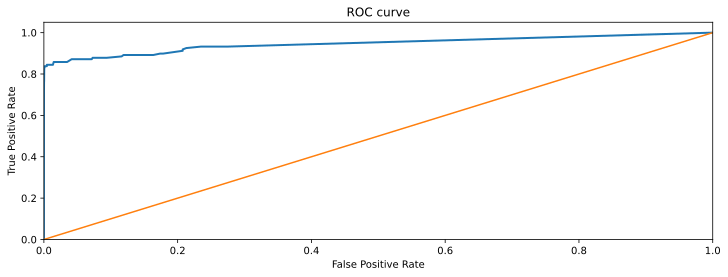

In [57]:
rcParams['figure.figsize'] = 12, 4
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

#### *Дополнительные задания:


1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

In [58]:
from sklearn.datasets import load_wine

In [59]:
data = load_wine()

In [60]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

In [61]:
data_keys = data.keys()
data_keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.

In [62]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [63]:
for line in data.DESCR.split('\n'):
    print(line)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

4). Сколько классов содержит целевая переменная датасета? Выведите названия классов.

In [64]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.

In [65]:
X = pd.DataFrame(data.data, columns=data.feature_names)

6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [67]:
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [68]:
X.shape

(178, 13)

7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'

In [69]:
data.target.dtype

dtype('int32')

In [70]:
X['target'] = data.target.astype(np.int64)

In [71]:
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [72]:
X['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

In [73]:
X_corr = X.corr()
X_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).

In [74]:
high_corr = X_corr.index[np.abs(X_corr['target']) > 0.5][:-1]
high_corr

Index(['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.

In [75]:
del X['target']

In [76]:
X_2 = pd.DataFrame({
    f'{col}_2': X[col] ** 2 for col in high_corr
})
X_2.head()

,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
0,243.36,7.8400,9.3636,1.0816,15.3664,1134225.0
1,125.44,7.0225,7.6176,1.1025,11.5600,1102500.0
2,345.96,7.8400,10.4976,1.0609,10.0489,1404225.0
3,282.24,14.8225,12.1801,0.7396,11.9025,2190400.0
4,441.00,7.8400,7.2361,1.0816,8.5849,540225.0


In [77]:
X_2.shape, X.shape

((178, 6), (178, 13))

In [78]:
new_X = pd.concat([X, X_2], axis=1)
new_X = new_X.sort_index(axis=1)
new_X.head()

,alcalinity_of_ash,alcalinity_of_ash_2,alcohol,ash,color_intensity,flavanoids,flavanoids_2,hue,hue_2,magnesium,malic_acid,nonflavanoid_phenols,od280/od315_of_diluted_wines,od280/od315_of_diluted_wines_2,proanthocyanins,proline,proline_2,total_phenols,total_phenols_2
0,15.6,243.36,14.23,2.43,5.64,3.06,9.3636,1.04,1.0816,127.0,1.71,0.28,3.92,15.3664,2.29,1065.0,1134225.0,2.80,7.8400
1,11.2,125.44,13.20,2.14,4.38,2.76,7.6176,1.05,1.1025,100.0,1.78,0.26,3.40,11.5600,1.28,1050.0,1102500.0,2.65,7.0225
2,18.6,345.96,13.16,2.67,5.68,3.24,10.4976,1.03,1.0609,101.0,2.36,0.30,3.17,10.0489,2.81,1185.0,1404225.0,2.80,7.8400
3,16.8,282.24,14.37,2.50,7.80,3.49,12.1801,0.86,0.7396,113.0,1.95,0.24,3.45,11.9025,2.18,1480.0,2190400.0,3.85,14.8225
4,21.0,441.00,13.24,2.87,4.32,2.69,7.2361,1.04,1.0816,118.0,2.59,0.39,2.93,8.5849,1.82,735.0,540225.0,2.80,7.8400


In [79]:
new_X.describe()

,alcalinity_of_ash,alcalinity_of_ash_2,alcohol,ash,color_intensity,flavanoids,flavanoids_2,hue,hue_2,magnesium,malic_acid,nonflavanoid_phenols,od280/od315_of_diluted_wines,od280/od315_of_diluted_wines_2,proanthocyanins,proline,proline_2,total_phenols,total_phenols_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02,178.000000,178.000000
mean,19.494944,391.142865,13.000618,2.366517,5.058090,2.029270,5.110049,0.957449,0.968661,99.741573,2.336348,0.361854,2.611685,7.322155,1.590899,746.893258,6.564591e+05,2.295112,5.657030
std,3.339564,133.671775,0.811827,0.274344,2.318286,0.998859,4.211441,0.228572,0.443798,14.282484,1.117146,0.124453,0.709990,3.584316,0.572359,314.907474,5.558591e+05,0.625851,2.936294
min,10.600000,112.360000,11.030000,1.360000,1.280000,0.340000,0.115600,0.480000,0.230400,70.000000,0.740000,0.130000,1.270000,1.612900,0.410000,278.000000,7.728400e+04,0.980000,0.960400
25%,17.200000,295.840000,12.362500,2.210000,3.220000,1.205000,1.452100,0.782500,0.612325,88.000000,1.602500,0.270000,1.937500,3.754075,1.250000,500.500000,2.505010e+05,1.742500,3.036325
50%,19.500000,380.250000,13.050000,2.360000,4.690000,2.135000,4.558250,0.965000,0.931250,98.000000,1.865000,0.340000,2.780000,7.728400,1.555000,673.500000,4.536045e+05,2.355000,5.546050
75%,21.500000,462.250000,13.677500,2.557500,6.200000,2.875000,8.265700,1.120000,1.254400,107.000000,3.082500,0.437500,3.170000,10.048900,1.950000,985.000000,9.702250e+05,2.800000,7.840000
max,30.000000,900.000000,14.830000,3.230000,13.000000,5.080000,25.806400,1.710000,2.924100,162.000000,5.800000,0.660000,4.000000,16.000000,3.580000,1680.000000,2.822400e+06,3.880000,15.054400
